In [1]:
!git clone https://github.com/Ayxux/NLP_Minor_Project

fatal: destination path 'NLP_Minor_Project' already exists and is not an empty directory.


In [2]:
%cd /content/NLP_Minor_Project/

!pip install -r REQUIREMENTS.txt


/content/NLP_Minor_Project
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.24.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy-3.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached scikit_learn-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached torch-2.0.0-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached transformers-4.26.1-py3-none-any.whl.metadata (100 kB)
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached matplotlib-3.7.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached sea

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


**DATA PREPROCESSING**

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data files
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet lemmatization

# Verify the tokenizer path
from nltk.data import find
try:
    find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Load dataset
file_path = "/content/drive/MyDrive/data/Online Retail.xlsx"
df = pd.read_excel(file_path)

# Focus on 'Description' column
df.dropna(subset=['Description'], inplace=True)  # Remove missing descriptions
df.drop_duplicates(subset=['Description'], inplace=True)  # Remove duplicates

# Convert 'Description' to string to avoid errors
df['Description'] = df['Description'].astype(str)

# Text preprocessing functions
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text

def preprocess_text(text):
    nltk.download('punkt', quiet=True)  # Ensure 'punkt' is available
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stopword removal
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply cleaning and preprocessing
df['Cleaned_Description'] = df['Description'].apply(clean_text)
df['Processed_Description'] = df['Cleaned_Description'].apply(preprocess_text)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Processed_Description'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Save processed data
df.to_csv("cleaned_data.csv", index=False)
tfidf_df.to_csv("tfidf_features.csv", index=False)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
train_df = pd.read_csv('cleaned_data.csv')

# View the first few rows of the DataFrame
print(train_df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

                   Cleaned_Description                Processed_Description  
0    white hanging heart tlight holder    white hanging heart tlight holder  
1                  w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

                   Cleaned_Description                Processed_Description  
0    white hanging heart tlight holder    white hanging heart tlight holder  
1                  w

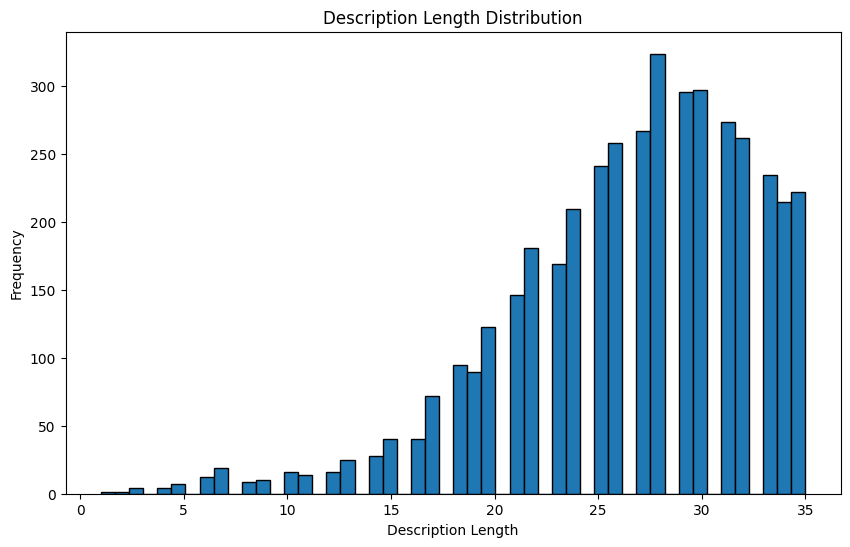

<ipython-input-7-20fb862aa8f0>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Description"].fillna("", inplace=True)


TF-IDF Vectorized Shape: (4223, 2151)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import spacy

nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

#Load dataset
file_path = "/content/drive/MyDrive/data/cleaned_data.csv"
df = pd.read_csv(file_path)

# EDA
print(df.head())
print(df.info())
print(df.isnull().sum())

# Text Length Distribution
df['Description_length'] = df['Description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
plt.hist(df['Description_length'], bins=50, edgecolor='black')
plt.title('Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

# Optimized Description Preprocessing
def preprocess_text_spacy(description):
    processed_texts = []
    for doc in nlp.pipe(description.dropna(), disable=["ner", "parser"]):  # Drop NaN values before processing
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Handle NaN by replacing them with empty strings
df["Description"].fillna("", inplace=True)

# Apply preprocessing on cleaned description
df["clean_text"] = preprocess_text_spacy(df["Description"])

# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

print("TF-IDF Vectorized Shape:", X_tfidf.shape)

In [8]:
!pip install gensim


In [9]:
!pip install --upgrade gensim

In [10]:
import pandas as pd

file_path = "/content/drive/MyDrive/data/cleaned_data.csv"
df = pd.read_csv(file_path)

if "clean_text" not in df.columns:
    print("Column 'clean_text' not found! Creating it from 'Description'...")
    df["clean_text"] = df["Description"].fillna("").astype(str)

# Tokenize
df["tokenized_text"] = df["clean_text"].apply(lambda x: x.split())
print(df[["clean_text", "tokenized_text"]].head())


Column 'clean_text' not found! Creating it from 'Description'...
                            clean_text  \
0   WHITE HANGING HEART T-LIGHT HOLDER   
1                  WHITE METAL LANTERN   
2       CREAM CUPID HEARTS COAT HANGER   
3  KNITTED UNION FLAG HOT WATER BOTTLE   
4       RED WOOLLY HOTTIE WHITE HEART.   

                               tokenized_text  
0    [WHITE, HANGING, HEART, T-LIGHT, HOLDER]  
1                     [WHITE, METAL, LANTERN]  
2        [CREAM, CUPID, HEARTS, COAT, HANGER]  
3  [KNITTED, UNION, FLAG, HOT, WATER, BOTTLE]  
4        [RED, WOOLLY, HOTTIE, WHITE, HEART.]  


In [11]:
!pip uninstall -y numpy gensim
!pip install --no-cache-dir --upgrade numpy gensim


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 128.9 MB/s eta 0:00:00


In [12]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

dictionary = Dictionary(df["tokenized_text"])
corpus = [dictionary.doc2bow(text) for text in df["tokenized_text"]]

num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")


Topic 0: 0.079*"HEART" + 0.050*"PAPER" + 0.047*"SMALL" + 0.046*"LARGE" + 0.035*"FELT" + 0.030*"WOODLAND" + 0.023*"SNACK" + 0.023*"PARK" + 0.022*"WHITE" + 0.020*"PINK"

Topic 1: 0.089*"WALL" + 0.053*"ART" + 0.032*"CLOCK" + 0.029*"PARLOUR" + 0.026*"KITCHEN" + 0.020*"BICYCLE" + 0.018*"," + 0.017*"HOOK" + 0.016*"BELL" + 0.015*"BLUE"

Topic 2: 0.079*"FRAME" + 0.028*"LOVE" + 0.026*"LANDMARK" + 0.023*"PANTRY" + 0.021*"MINI" + 0.019*"LONDON" + 0.017*"HEART" + 0.016*"PICTURE" + 0.015*"SMALL" + 0.014*"LARGE"

Topic 3: 0.045*"NECKLACE" + 0.040*"BLACK" + 0.039*"GLASS" + 0.029*"SILVER" + 0.029*"CANDLE" + 0.022*"EARRINGS" + 0.020*"CRYSTAL" + 0.018*"HOLDER" + 0.018*"BRACELET" + 0.017*"ORBIT"

Topic 4: 0.068*"RED" + 0.061*"BAG" + 0.045*"VINTAGE" + 0.036*"DESIGN" + 0.029*"PINK" + 0.028*"RETROSPOT" + 0.026*"POLKADOT" + 0.026*"TRAY" + 0.022*"MUG" + 0.021*"BLUE"

Topic 5: 0.034*"BIRD" + 0.029*"VINTAGE" + 0.025*"CLASSIC" + 0.021*"GARLAND" + 0.020*"&" + 0.019*"TUSCAN" + 0.019*"VILLA" + 0.017*"KEEP" + 0.016*

In [13]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=df["tokenized_text"], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f"LDA Coherence Score: {coherence_score}")


LDA Coherence Score: 0.49482514182773707


In [14]:
!pip install --upgrade pyLDAvis


In [15]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from pyLDAvis import display

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
display(vis)


In [16]:
topics = lda_model.print_topics(num_words=10)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}\n")


Topic 0: 0.079*"HEART" + 0.050*"PAPER" + 0.047*"SMALL" + 0.046*"LARGE" + 0.035*"FELT" + 0.030*"WOODLAND" + 0.023*"SNACK" + 0.023*"PARK" + 0.022*"WHITE" + 0.020*"PINK"

Topic 1: 0.089*"WALL" + 0.053*"ART" + 0.032*"CLOCK" + 0.029*"PARLOUR" + 0.026*"KITCHEN" + 0.020*"BICYCLE" + 0.018*"," + 0.017*"HOOK" + 0.016*"BELL" + 0.015*"BLUE"

Topic 2: 0.079*"FRAME" + 0.028*"LOVE" + 0.026*"LANDMARK" + 0.023*"PANTRY" + 0.021*"MINI" + 0.019*"LONDON" + 0.017*"HEART" + 0.016*"PICTURE" + 0.015*"SMALL" + 0.014*"LARGE"

Topic 3: 0.045*"NECKLACE" + 0.040*"BLACK" + 0.039*"GLASS" + 0.029*"SILVER" + 0.029*"CANDLE" + 0.022*"EARRINGS" + 0.020*"CRYSTAL" + 0.018*"HOLDER" + 0.018*"BRACELET" + 0.017*"ORBIT"

Topic 4: 0.068*"RED" + 0.061*"BAG" + 0.045*"VINTAGE" + 0.036*"DESIGN" + 0.029*"PINK" + 0.028*"RETROSPOT" + 0.026*"POLKADOT" + 0.026*"TRAY" + 0.022*"MUG" + 0.021*"BLUE"

Topic 5: 0.034*"BIRD" + 0.029*"VINTAGE" + 0.025*"CLASSIC" + 0.021*"GARLAND" + 0.020*"&" + 0.019*"TUSCAN" + 0.019*"VILLA" + 0.017*"KEEP" + 0.016*

In [17]:
def get_document_topics(lda_model, corpus):
    doc_topics = []
    for doc in corpus:
        topic_distribution = lda_model.get_document_topics(doc)
        top_topic = max(topic_distribution, key=lambda x: x[1])[0]
        doc_topics.append(top_topic)
    return doc_topics

df["assigned_topic"] = get_document_topics(lda_model, corpus)

print(df[["Description", "assigned_topic"]].head(10))


                           Description  assigned_topic
0   WHITE HANGING HEART T-LIGHT HOLDER               8
1                  WHITE METAL LANTERN               0
2       CREAM CUPID HEARTS COAT HANGER               7
3  KNITTED UNION FLAG HOT WATER BOTTLE               3
4       RED WOOLLY HOTTIE WHITE HEART.               9
5         SET 7 BABUSHKA NESTING BOXES               6
6    GLASS STAR FROSTED T-LIGHT HOLDER               3
7               HAND WARMER UNION JACK               9
8            HAND WARMER RED POLKA DOT               4
9        ASSORTED COLOUR BIRD ORNAMENT               3


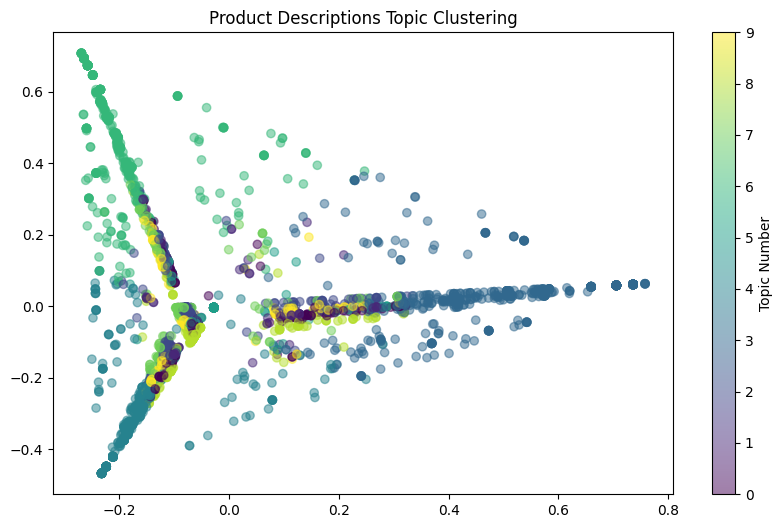

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Convert topic distributions into a feature matrix
topic_matrix = np.array([[prob for _, prob in lda_model.get_document_topics(doc, minimum_probability=0)] for doc in corpus])

# Reduce dimensionality
pca = PCA(n_components=2)
topic_pca = pca.fit_transform(topic_matrix)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(topic_pca[:, 0], topic_pca[:, 1], c=df["assigned_topic"], cmap='viridis', alpha=0.5)
plt.colorbar(label="Topic Number")
plt.title("Product Descriptions Topic Clustering")
plt.show()


In [19]:
!pip install bertopic
from bertopic import BERTopic

# Train BERTopic model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df["clean_text"])

# Visualize topics
topic_model.visualize_barchart(top_n_topics=10)


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["assigned_topic"]  # LDA topics as labels

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate Performance
y_pred_logreg = logreg.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Print Classification Report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       101
           1       0.86      0.73      0.79        70
           2       0.88      0.70      0.78        73
           3       0.71      0.86      0.78       125
           4       0.83      0.83      0.83       109
           5       0.72      0.67      0.69        69
           6       0.77      0.89      0.83        89
           7       0.80      0.77      0.79        57
           8       0.84      0.80      0.82        81
           9       0.77      0.77      0.77        71

    accuracy                           0.80       845
   macro avg       0.81      0.79      0.79       845
weighted avg       0.80      0.80      0.80       845

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       101
           1       0.82      0.70      0.75        70
           2       0

In [21]:
!pip uninstall transformers datasets -y
!pip install --upgrade pip
!pip install transformers datasets torch



Found existing installation: transformers 4.50.0
Uninstalling transformers-4.50.0:
  Successfully uninstalled transformers-4.50.0
Found existing installation: datasets 3.4.1
Uninstalling datasets-3.4.1:
  Successfully uninstalled datasets-3.4.1
  Using cached transformers-4.50.0-py3-none-any.whl.metadata (39 kB)
  Using cached datasets-3.4.1-py3-none-any.whl.metadata (19 kB)
Using cached transformers-4.50.0-py3-none-any.whl (10.2 MB)
Using cached datasets-3.4.1-py3-none-any.whl (487 kB)


In [1]:
!pip install datasets


In [2]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder


#Load dataset
file_path = "/content/drive/MyDrive/data/cleaned_data.csv"
df = pd.read_csv(file_path)

# Sample dataset with small subset for fast training
df_subset = df.sample(n=5, random_state=42)

# DistilBERT Model Code
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)



label_encoder = LabelEncoder()
df_subset["label"] = label_encoder.fit_transform(df_subset["Processed_Description"])
print("Label mapping:", dict(enumerate(label_encoder.classes_)))

# Data Preprocessing
def preprocess_function(examples):
    examples['text'] = [str(text) for text in examples['text']]
    return tokenizer(
        examples['text'],
        truncation=True,
        padding="max_length",
        max_length=512
    )

# Prepare Dataset
label_encoder = LabelEncoder()
df_subset["label"] = label_encoder.fit_transform(df_subset["Cleaned_Description"])
dataset = Dataset.from_pandas(df_subset[["Cleaned_Description", "label"]].rename(columns={"Cleaned_Description": "text", "Processed_Description": "label"}))
dataset = dataset.map(preprocess_function, batched=True)

# Split Dataset into Train and Test
train_dataset, test_dataset = dataset.train_test_split(test_size=0.2).values()

# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    per_device_train_batch_size=2,       # Reduced batch size
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,       # Simulates larger batches
    logging_dir='./logs',
    logging_steps=50,
    do_train=True,
    do_eval=True,
    save_steps=1000,
    max_steps=10,
    fp16=True,                            # Mixed Precision Training
)

# Define the Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the DistilBERT Model
trainer.train()

# Save the model after training
trainer.save_model("distilbert_model")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Label mapping: {0: 'bunny wooden painted flower', 1: 'easter tin bucket', 2: 'hanging wood felt butterfly', 3: 'playing card love london', 4: 'unsaleable destroyed'}


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: sahilbinakar (sahilbinakar-kalinga-institute-of-industrial-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,No log,1.636114
2,No log,1.749822
3,No log,1.858164
4,No log,1.949956
5,No log,2.014942
6,No log,2.076935
7,No log,2.123684
8,No log,2.158015
9,No log,2.177736
10,No log,2.186553


In [3]:
model.save_pretrained('/content/drive/MyDrive/data/distilbert_online_retail')
tokenizer.save_pretrained('/content/drive/MyDrive/data/distilbert_online_retail')


('/content/drive/MyDrive/data/distilbert_online_retail/tokenizer_config.json',
 '/content/drive/MyDrive/data/distilbert_online_retail/special_tokens_map.json',
 '/content/drive/MyDrive/data/distilbert_online_retail/vocab.txt',
 '/content/drive/MyDrive/data/distilbert_online_retail/added_tokens.json')

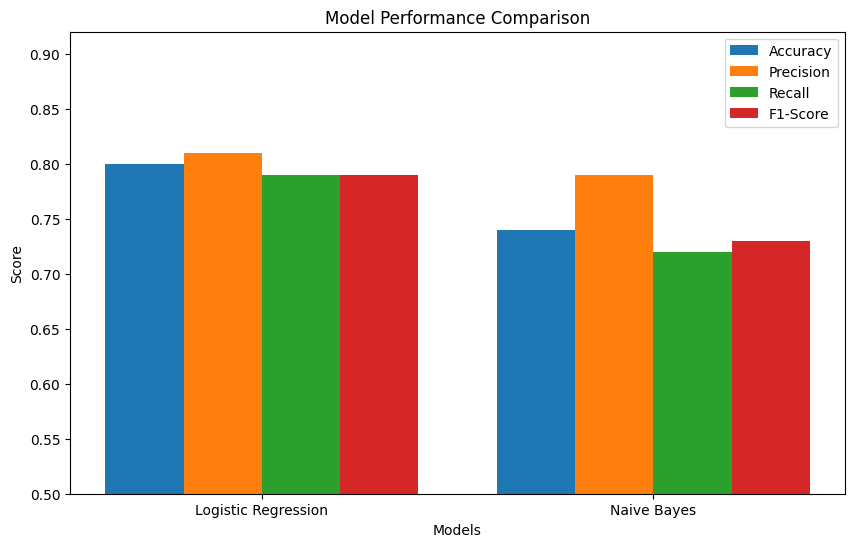

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ["Logistic Regression", "Naive Bayes"]

# Performance metrics
accuracy = [0.80, 0.74]
precision = [0.81, 0.79]
recall = [0.79, 0.72]
f1_score = [0.79, 0.73]
# Create a grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1_score]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, values[i], width, label=metric)
# Formatting
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.5, 0.92)  # Set y-axis limit for better visualization
plt.show()


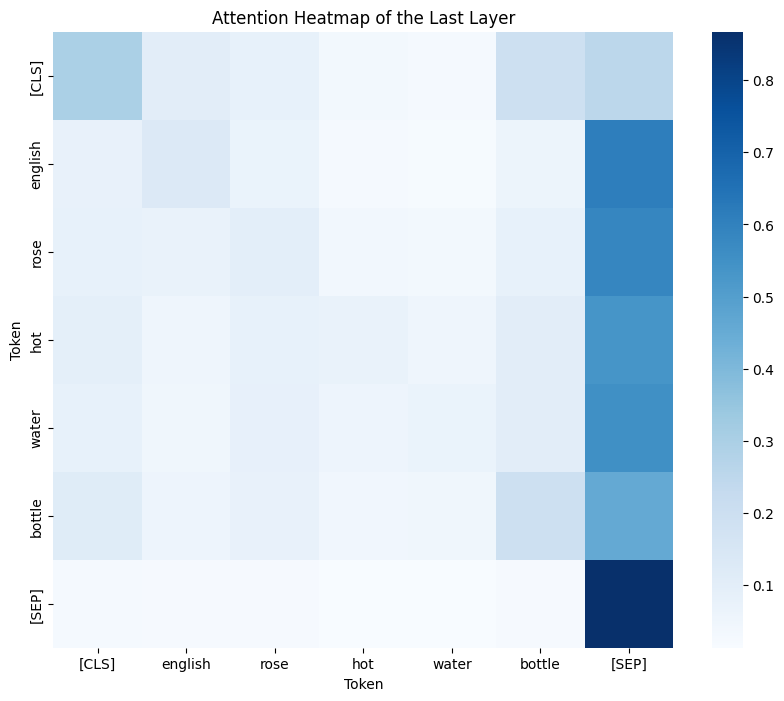

In [10]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = '/content/drive/MyDrive/data/distilbert_online_retail'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, output_attentions=True, attn_implementation="eager")

# Prepare the text
text = "ENGLISH ROSE HOT WATER BOTTLE"

# Tokenize text and get model's attention weights
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
with torch.no_grad():
    outputs = model(**inputs)


attentions = outputs.attentions
last_layer_attention = attentions[-1]
attention_weights = last_layer_attention.mean(dim=1).squeeze().cpu().numpy()

# tokenized words
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plotting the attention heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap='Blues', cbar=True)
plt.title('Attention Heatmap of the Last Layer')
plt.xlabel('Token')
plt.ylabel('Token')
plt.show()